In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

feature = pd.DataFrame(iris['data'],columns=iris['feature_names'])
target = pd.DataFrame(iris['target'],columns=['class'])

data = pd.concat([feature,target],axis=1)
df=data[data['class']!=2]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


C:\Users\yckuo\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


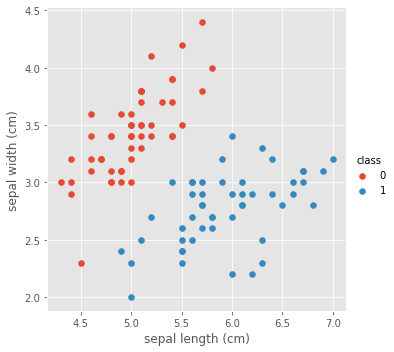

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
g=sns.FacetGrid(df,hue='class',size=5)
g.map(plt.scatter,"sepal length (cm)" , "sepal width (cm)")
g.add_legend()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.iloc[:,:2].values
Y=df.iloc[:,4].values
sc=StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [5]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

lr= LogisticRegression(C=100.0 ,random_state=1)
#C=1/a
lr.fit(X_std,Y)

print(lr.coef_)
print(lr.intercept_)
print(lr.coef_[0])

[[ 9.97519721 -6.71009506]]
[1.81731713]
[ 9.97519721 -6.71009506]


In [7]:
def plot_dicision_regions(X,Y,classifier,test_idx=None,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    camp = ListedColormap(colors[:len(np.unique(Y))])

    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,camp=camp)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y==cl,0],
                    y=X[Y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    
    if test_idx:
        x_test,y_test=X[test_idx,:],Y[test_idx]

        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=100,
                    label='test set')

    

<ipython-input-7-a069a626af4d>:11: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx1,xx2,Z,alpha=0.3,camp=camp)


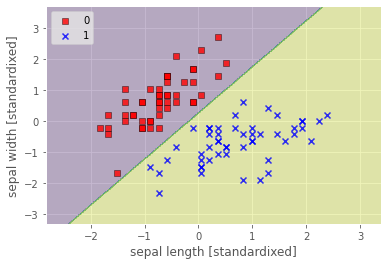

In [10]:
plot_dicision_regions(X_std,Y,classifier=lr)
x=np.linspace(-3,3.5)
plt.xlabel('sepal length [standardixed]')
plt.ylabel('sepal width [standardixed]')
plt.legend(loc='upper left')